##Introduction to Computer Vison with Tensorflow

Computer vison is the practise of writting algorithems which can see the data from camara

##Get the data
link:https://www.kaggle.com/dansbecker/food-101

In here only using pizza and steak (Binary Classification)

In [55]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2021-07-14 05:18:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.250.101.128, 142.251.2.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.2’

pizza_steak.zip.2   100%[===================>] 104.50M   139MB/s    in 0.8s    

2021-07-14 05:18:56 (139 MB/s) - ‘pizza_steak.zip.2’ saved [109579078/109579078]



##Inspect the Data

A vey crutial step at the begining is the become one with the data.At the computer vision this means visual many data.

In [56]:
!ls pizza_steak

test  train


In [57]:
import os

#walk though the dir and list the number
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in ''{dirpath}.")

There are 2 directories and 1 images in ''pizza_steak.
There are 2 directories and 1 images in ''pizza_steak/test.
There are 0 directories and 250 images in ''pizza_steak/test/pizza.
There are 0 directories and 250 images in ''pizza_steak/test/steak.
There are 2 directories and 1 images in ''pizza_steak/train.
There are 0 directories and 750 images in ''pizza_steak/train/pizza.
There are 0 directories and 750 images in ''pizza_steak/train/steak.


In [58]:
#extra file in the dir is ".DS Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul 14 04:36 .
drwxr-xr-x 1 root root 4096 Jul 14 05:18 ..
-rw-r--r-- 1 root root 6148 Jul 14 05:18 .DS_Store
drwxr-xr-x 4 root root 4096 Jul 14 04:36 test
drwxr-xr-x 4 root root 4096 Jul 14 04:36 train


In [59]:
#another way to find out how many images in the file
num_steak_images_train =len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

##Visualize the Data

In [60]:
#get the class names programatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))

#remove the ds store
class_names=class_names[1:]
print(class_names)

['pizza' 'steak']


In [61]:
#visulaize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #setup the target directory 
  target_folder =target_dir+target_class

  #get the random image path
  random_image =random.sample(os.listdir(target_folder),1)

  #read the image and plot it using matplotlib
  img =mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}")

  return img
  

Image shape : (512, 512, 3)


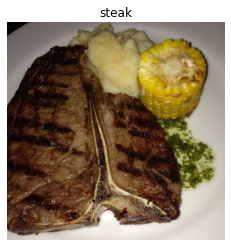

In [62]:
#view random image from training data set
img  =view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak"
)


In [63]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  3,   3,   5],
        [  3,   3,   5],
        [  4,   4,   6],
        ...,
        [109,  98,  96],
        [108,  97,  95],
        [108,  97,  95]],

       [[  2,   2,   4],
        [  3,   3,   5],
        [  4,   4,   6],
        ...,
        [109,  98,  96],
        [109,  98,  96],
        [109,  98,  96]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  4,   4,   6],
        ...,
        [110,  99,  97],
        [110,  99,  97],
        [109,  98,  96]],

       ...,

       [[195, 186, 181],
        [195, 186, 181],
        [196, 187, 182],
        ...,
        [213, 203, 194],
        [212, 202, 193],
        [212, 202, 193]],

       [[195, 186, 181],
        [195, 186, 181],
        [196, 187, 182],
        ...,
        [212, 202, 193],
        [212, 202, 193],
        [212, 202, 193]],

       [[195, 186, 181],
        [195, 186, 181],
        [196, 187, 182],
        ...,
        [212, 202, 19

In [64]:
#view the image shape 
img.shape

(512, 512, 3)

In [65]:
#get all the pixel values 0.1
img/255

array([[[0.01176471, 0.01176471, 0.01960784],
        [0.01176471, 0.01176471, 0.01960784],
        [0.01568627, 0.01568627, 0.02352941],
        ...,
        [0.42745098, 0.38431373, 0.37647059],
        [0.42352941, 0.38039216, 0.37254902],
        [0.42352941, 0.38039216, 0.37254902]],

       [[0.00784314, 0.00784314, 0.01568627],
        [0.01176471, 0.01176471, 0.01960784],
        [0.01568627, 0.01568627, 0.02352941],
        ...,
        [0.42745098, 0.38431373, 0.37647059],
        [0.42745098, 0.38431373, 0.37647059],
        [0.42745098, 0.38431373, 0.37647059]],

       [[0.01176471, 0.01176471, 0.01960784],
        [0.01176471, 0.01176471, 0.01960784],
        [0.01568627, 0.01568627, 0.02352941],
        ...,
        [0.43137255, 0.38823529, 0.38039216],
        [0.43137255, 0.38823529, 0.38039216],
        [0.42745098, 0.38431373, 0.37647059]],

       ...,

       [[0.76470588, 0.72941176, 0.70980392],
        [0.76470588, 0.72941176, 0.70980392],
        [0.76862745, 0

##An end to end Example

build the convolutional neural network to find patterns in images ,more specifically way we need

*load our images

*preprocess our images

*build a CNN to find patternsin our image

*compile our CNN

*fit the CNN to training data

In [66]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess data(get all pixel values between 0 and 1)
train_datagen =ImageDataGenerator(rescale=1./255)
valid_datagen =ImageDataGenerator(rescale=1./255)

#setup paths to directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#import data from directories anf turn into batches
train_data =train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#build the CNN model
model_1 =tf.keras.Sequential([
                              tf.keras.layers.Conv2D(filters=10,
                                                     kernel_size=3,
                                                     activation="relu",
                                                     input_shape=(224,224,3)),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(pool_size=2,
                                                        padding="valid"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

#fit the model
history_1 =model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 0.5505 - accuracy: 0.7227 - val_loss: 0.4415 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4262 - accuracy: 0.8033 - val_loss: 0.3525 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4188 - accuracy: 0.8100 - val_loss: 0.3612 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3596 - accuracy: 0.8493 - val_loss: 0.3140 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3177 - accuracy: 0.8687 - val_loss: 0.3316 - val_accuracy: 0.8580


If above is taking longer make sure to change the hardware type to "GPU".

Then restart the envirnment

In [67]:
# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.
# Epoch 1/5
# 47/47 [==============================] - ETA: 0s - loss: 0.5718 - accuracy: 0.6933

In [68]:
#model summary
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 28090)            

##Use the model as before

relicate the model pre built in classification



In [69]:
#set random seed
tf.random.set_seed(42)

#create a model to replicte playgroud model
model_2 =tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 9s 188ms/step - loss: 0.7004 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6967 - accuracy: 0.4993 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 176ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [70]:
#model summary
model_2.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 602116    
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [71]:
#set random seed
tf.random.set_seed(42)

#create a model to replicte playgroud model
model_3 =tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(100,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_3=model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))





Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 2.7720 - accuracy: 0.6147 - val_loss: 0.6105 - val_accuracy: 0.7700
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.7404 - accuracy: 0.7260 - val_loss: 0.5057 - val_accuracy: 0.7660
Epoch 3/5
47/47 [==============================] - 8s 174ms/step - loss: 0.6055 - accuracy: 0.7587 - val_loss: 0.5694 - val_accuracy: 0.7220
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.7256 - accuracy: 0.7313 - val_loss: 0.5390 - val_accuracy: 0.7920
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.5380 - accuracy: 0.7793 - val_loss: 0.5033 - val_accuracy: 0.7720


In [72]:
#model 3 summary
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               15052900  
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


##Binary Clssification

1.become one with the dataset

2.preproess the data

3.create the model

4.fit the model

5.evaluate the model

6.adjust different parameters and improve the model

7.repeat until satisfied

##Visualzie the data

Image shape : (384, 512, 3)
Image shape : (512, 507, 3)


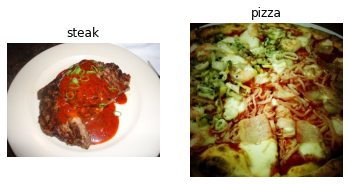

In [73]:
plt.figure()
plt.subplot(1,2,1)
steak_img =view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img=view_random_image("pizza_steak/train/","pizza")

##Preprocess data


In [74]:
#define the directory
train_dir="pizza_steak/train/"
test_dir="pizza_steak/test/"

In [75]:
#create train and test data generator and rescale data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [76]:
#loading the image data from directory
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

test_data=test_datagen.flow_from_directory(directory=test_dir,
                                           target_size=(224,224),
                                           class_mode="binary",
                                           batch_size=32)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [77]:
#get a sample of training data batch
images,labels=train_data.next()
len(images),len(labels)


(32, 32)

In [78]:
#get the first two images
images[:2],images[0].shape


(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [79]:
#view the first batch labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

##Create the CNN Model



In [80]:
#make the creating a model easier 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras import Sequential

#craete the model
model_4=Sequential([
                     Conv2D(filters=10,#numbers od sliding windows
                            kernel_size=3,#the size of the slidng window
                            strides=1,#the size of the step slidng window take in image
                            padding="valid",#use "same" if output shape same as input shape ,input and output shapes are different then use "valid"
                            activation="relu",
                            input_shape=(224,224,3)),
                     Conv2D(10,3,activation="relu"),
                     Conv2D(10,3,activation="relu"),
                     Flatten(),
                     Dense(1,activation="sigmoid")

])

In [81]:
#compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [82]:
#get the summary
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_8 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [83]:
2180*218

475240

In [84]:
#fit the model
history_4 =model_4.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 196ms/step - loss: 1.4404 - accuracy: 0.6440 - val_loss: 0.4704 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4810 - accuracy: 0.7847 - val_loss: 0.4326 - val_accuracy: 0.8080
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3651 - accuracy: 0.8520 - val_loss: 0.3808 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 9s 190ms/step - loss: 0.2040 - accuracy: 0.9293 - val_loss: 0.4517 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 9s 189ms/step - loss: 0.0864 - accuracy: 0.9753 - val_loss: 0.5758 - val_accuracy: 0.7860


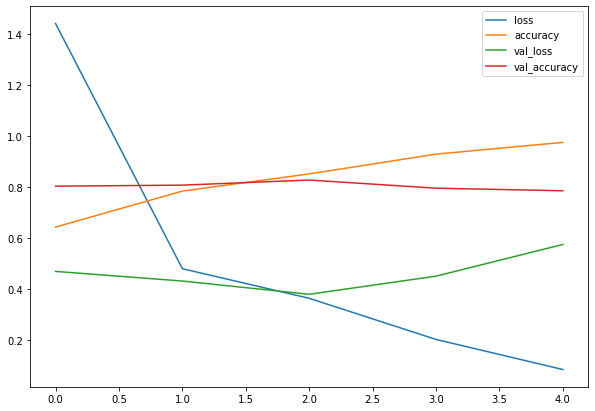

In [85]:
##Evaluate the model
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [86]:
#plot the validation and training curve
def plot_loss_curve(history):
  """
  Returns separte loss curve for trainnnig and validation mtrics
  """

  loss=history.history["loss"]
  val_loss=history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs=range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs,loss,label="training_loss")
  plt.plot(epochs,val_loss,label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  #plot Accuracy
  plt.figure()
  plt.plot(epochs,loss,label="training_accuracy")
  plt.plot(epochs,val_accuracy,label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()


when model validation starts to increase it likly model try to overfitting to the training data set.

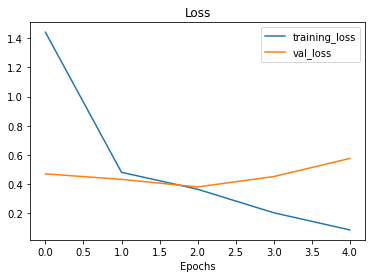

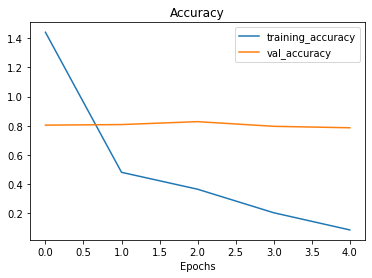

In [87]:
#check out the loss and accuracy for model
plot_loss_curve(history_4)

##Adjust model parameters

1.create a baseline 

2.beat the baseline by overfitting a larger model

3.reduce the overfitting

*ways to reduce the overfitting

1.incease the number of conv layers

2.increase the number of filters

3.add another dense layeers to the output of flattned ayer

*reduce overfitting:

1.add data augmentation

2.add regilization layers

3.add more data

In [88]:
#crate the model
model_5 =Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])



In [89]:
#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [90]:
#fit the model
history_5 =model_5.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 0.6229 - accuracy: 0.6287 - val_loss: 0.4784 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4776 - accuracy: 0.7740 - val_loss: 0.3970 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4412 - accuracy: 0.8093 - val_loss: 0.3786 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4174 - accuracy: 0.8220 - val_loss: 0.3727 - val_accuracy: 0.8380
Epoch 5/5
47/47 [==============================] - 8s 178ms/step - loss: 0.3898 - accuracy: 0.8320 - val_loss: 0.3585 - val_accuracy: 0.8440


In [91]:
#get the summary
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 6760)             

In [92]:
model_4.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_8 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


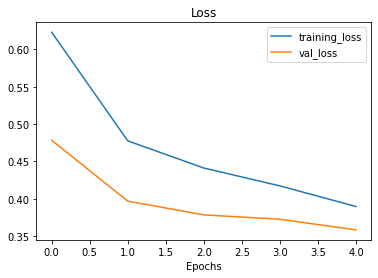

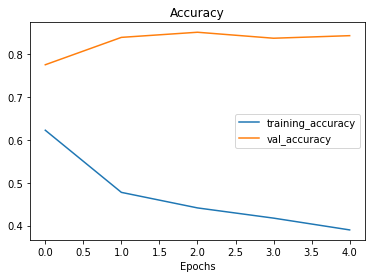

In [93]:
plot_loss_curve(history_5)

##Data Augmentation

Data Augmentaion add only to train data.

Data saved same in the directory while chnaged while loading

In [109]:
#create ImageDataGenertor traninig with data augmentation
train_datagen_augmented =ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)

#Create Image data gen without data generator
train_datagen =ImageDataGenerator(rescale=1/255.)

#Create Image data gen without data generator
test_datagen =ImageDataGenerator(rescale=1/255.)



In [110]:
#import data aygmented it from training directory
print("Augmented training data")

train_datagen_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle =False)

#create non augmented train data
print("Non -Augmented Training Data")
train_data=train_datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle =False)
IMG_SIZE=(224,224)

#craete testdata batches
print("Non-augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle =False)


Augmented training data
Found 1500 images belonging to 2 classes.
Non -Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [111]:
#get some sample augmented data
images,labels =train_data.next()
augmented_images,augmented_labels =train_datagen_augmented.next()

In [112]:
augmented_images

array([[[[0.45823905, 0.47117275, 0.34901962],
         [0.45823961, 0.47117218, 0.34901962],
         [0.45824018, 0.47117162, 0.34901962],
         ...,
         [0.54856145, 0.5916987 , 0.47405165],
         [0.548562  , 0.59169924, 0.47405222],
         [0.5485626 , 0.59169984, 0.4740528 ]],

        [[0.46514708, 0.47691178, 0.35534313],
         [0.4651482 , 0.47691292, 0.35534427],
         [0.46514934, 0.47691405, 0.35534543],
         ...,
         [0.5457316 , 0.58886886, 0.47122177],
         [0.545731  , 0.58886826, 0.4712212 ],
         [0.5457305 , 0.5888677 , 0.47122064]],

        [[0.4577074 , 0.4844043 , 0.38672715],
         [0.45770565, 0.48440543, 0.38673288],
         [0.45770395, 0.48440656, 0.38673857],
         ...,
         [0.5482108 , 0.59134805, 0.47370103],
         [0.5482114 , 0.59134865, 0.4737016 ],
         [0.54821193, 0.5913492 , 0.47370216]],

        ...,

        [[0.40000004, 0.454902  , 0.3254902 ],
         [0.40000004, 0.454902  , 0.3254902 ]

(-0.5, 223.5, 223.5, -0.5)

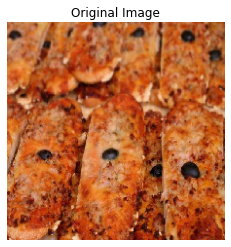

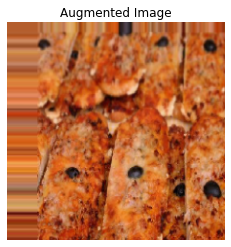

In [114]:
#show the original image 
import random
random_number =random.randint(0,32)
plt.imshow(images[random_number])
plt.title(f'Original Image')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image")
plt.axis(False)

In [115]:
#crate the model
model_6 =Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

#compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


#fit the model
history_6 =model_6.fit(train_datagen_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_datagen_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 22s 469ms/step - loss: 0.7261 - accuracy: 0.5727 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 22s 459ms/step - loss: 0.6995 - accuracy: 0.5007 - val_loss: 0.6806 - val_accuracy: 0.5060
Epoch 3/5
47/47 [==============================] - 21s 452ms/step - loss: 0.7038 - accuracy: 0.4467 - val_loss: 0.6828 - val_accuracy: 0.5060
Epoch 4/5
47/47 [==============================] - 21s 456ms/step - loss: 0.7037 - accuracy: 0.5860 - val_loss: 0.6476 - val_accuracy: 0.7480
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.6879 - accuracy: 0.5820 - val_loss: 0.6490 - val_accuracy: 0.7480


In [116]:
#evaluate
model_6.evaluate(test_data)

16/16 [==============================] - 2s 127ms/step - loss: 0.6490 - accuracy: 0.7480


[0.648969829082489, 0.7480000257492065]

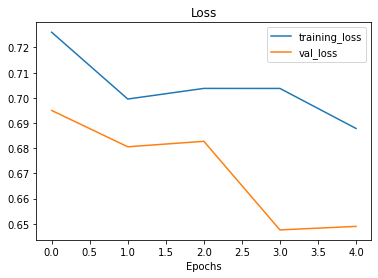

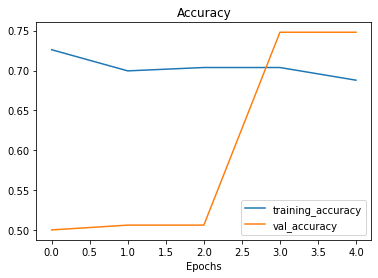

In [117]:
#check model training curve
plot_loss_curve(history_6)

##Shuffle Augmented Training Data

In [118]:
#create ImageDataGenertor traninig with data augmentation
train_datagen_augmented =ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2,
                                            shear_range=0.2,
                                            zoom_range=0.2,
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            horizontal_flip=True)

#Create Image data gen without data generator
train_datagen =ImageDataGenerator(rescale=1/255.)

#Create Image data gen without data generator
test_datagen =ImageDataGenerator(rescale=1/255.)

#import data aygmented it from training directory
print("Augmented training data")

train_datagen_augmented=train_datagen_augmented.flow_from_directory(train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary",
                                                                    shuffle =True)

#create non augmented train data
print("Non -Augmented Training Data")
train_data=train_datagen.flow_from_directory(train_dir,
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle =True)
IMG_SIZE=(224,224)

#craete testdata batches
print("Non-augmented test data")
test_data=test_datagen.flow_from_directory(test_dir,
                                            target_size=IMG_SIZE,
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle =True)

#get some sample augmented data
images,labels =train_data.next()
augmented_images,augmented_labels =train_datagen_augmented.next()

Augmented training data
Found 1500 images belonging to 2 classes.
Non -Augmented Training Data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 500 images belonging to 2 classes.


In [122]:
#crate the model
model_7 =Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

#compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


#fit the model
history_7 =model_7.fit(train_datagen_augmented,
                       epochs=3,
                       steps_per_epoch=len(train_datagen_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/3
47/47 [==============================] - 22s 458ms/step - loss: 0.6645 - accuracy: 0.5840 - val_loss: 0.5435 - val_accuracy: 0.7320
Epoch 2/3
47/47 [==============================] - 21s 455ms/step - loss: 0.5890 - accuracy: 0.6787 - val_loss: 0.4564 - val_accuracy: 0.8180
Epoch 3/3
47/47 [==============================] - 21s 450ms/step - loss: 0.5225 - accuracy: 0.7667 - val_loss: 0.4147 - val_accuracy: 0.8340


In [123]:
#evaluate
model_7.evaluate(test_data)

16/16 [==============================] - 2s 127ms/step - loss: 0.4147 - accuracy: 0.8340


[0.414734423160553, 0.8339999914169312]

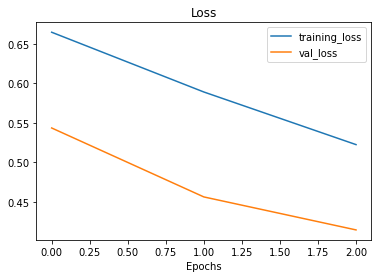

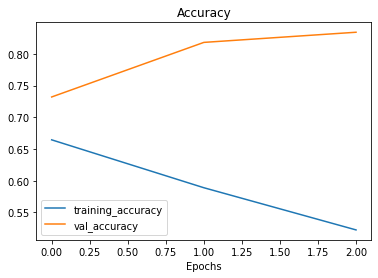

In [124]:
#check model training curve
plot_loss_curve(history_7)

##Repeat Until Satisfied

Few things to try to improve the model

1.incease the number of model layers

2.increase the number of filters in layers

3.train for longer

4.find the ideal learning rate

5.get more data

6.use another model -transfer learning






In [126]:
#crate the model
model_8 =Sequential([
                     Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(pool_size=2),
                     Conv2D(10,3,activation="relu"),
                     Conv2D(10,3,activation="relu"),
                     MaxPool2D(),
                     Flatten(),
                     Dense(1,activation="sigmoid")
])

#compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


#fit the model
history_8 =model_7.fit(train_datagen_augmented,
                       epochs=5,
                       steps_per_epoch=len(train_datagen_augmented),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5003 - accuracy: 0.7613 - val_loss: 0.3710 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 21s 454ms/step - loss: 0.4881 - accuracy: 0.7693 - val_loss: 0.3659 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 21s 453ms/step - loss: 0.4702 - accuracy: 0.7800 - val_loss: 0.3492 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 21s 450ms/step - loss: 0.4694 - accuracy: 0.7840 - val_loss: 0.4938 - val_accuracy: 0.7180
Epoch 5/5
47/47 [==============================] - 21s 450ms/step - loss: 0.4773 - accuracy: 0.7800 - val_loss: 0.3350 - val_accuracy: 0.8560


##Making a prediction with trained model on custom data

In [133]:
pip install matplotlib


In [157]:
!pip install image 



     |████████████████████████████████| 7.9MB 9.9MB/s 
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19495 sha256=700a1df1f00a8e864e71786f63421b3643954ef3f33b2f069d4c0f3e094814f0
  Stored in directory: /root/.cache/pip/wheels/87/4c/60/d5904e69c837fcdea7e03ffa0c657f35ced7e398c6f3ca17cc
Successfully built image


In [159]:
#view the example image

import matplotlib.image as mpimg
import matplotlib.pyplot as plt


!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg 


--2021-07-14 06:15:23--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-steak.jpeg.3’

03-steak.jpeg.3         [ <=>                ] 116.28K   641KB/s    in 0.2s    

2021-07-14 06:15:24 (641 KB/s) - ‘03-steak.jpeg.3’ saved [119074]



(-0.5, 3023.5, 4031.5, -0.5)

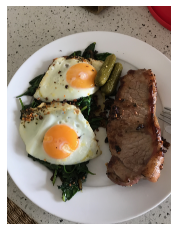

In [163]:
steak =mpimg.imread("/content/sample_data/03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [164]:
#shape of the iamge
steak.shape

(4032, 3024, 3)

In [165]:
steak

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [168]:
#create a fucntion to import image to resize it able to work with model
def load_prep_image(filename,img_shape=224):
  """
  Reads thhe image and reshape into tensor and reshape
  """
  #read in the image
  img =tf.io.read_file(filename)

  #decode the read file into tensor
  img =tf.image.decode_image(img)

  #resize the image
  img =tf.image.resize(img,size=[img_shape,img_shape])

  #rescale the image between to  and 1 
  img =img/255

  return img

In [169]:
#load and preprocess our custom image
steak =load_prep_image("/content/sample_data/03-steak.jpeg")
steak


<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [171]:
#make a prediction
model_8.predict(tf.expand_dims(steak,axis=0))

array([[0.4938462]], dtype=float32)

In [175]:
#make a prediction
pred =model_7.predict(tf.expand_dims(steak,axis=0))

In [176]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [177]:
#index the class by rounding the prediction probalities
pred_class =class_names[int(tf.round(pred))]
pred_class

'steak'

In [180]:
def pred_and_plot(model,filename,class_names=class_names):
  """
  Imports image and make predciton with model and plots the image with the predicted label
  """

  #import the target image and prepared
  img =load_prep_image(filename)

  #make prediction
  pred =model.predict(tf.expand_dims(img,axis=0))

  #get the precited class

  pred_class =class_names[int(tf.round(pred))]

  #plot the image and class predicted
  plt.imshow(img)
  plt.title(f"Prediction :{pred_class}")
  plt.axis(False)



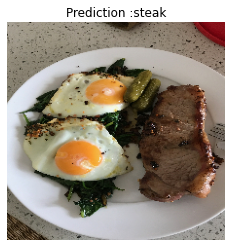

In [181]:
#test the model on custom image
pred_and_plot(model_7,"/content/sample_data/03-steak.jpeg")